<a href="https://colab.research.google.com/github/dhanunjaireddy07/CreditCard-Fraud/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import pearsonr
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.shape

(126842, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
df.shape

(126842, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126842 entries, 0 to 126841
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    126842 non-null  int64  
 1   V1      126842 non-null  float64
 2   V2      126842 non-null  float64
 3   V3      126842 non-null  float64
 4   V4      126842 non-null  float64
 5   V5      126842 non-null  float64
 6   V6      126842 non-null  float64
 7   V7      126842 non-null  float64
 8   V8      126842 non-null  float64
 9   V9      126841 non-null  float64
 10  V10     126841 non-null  float64
 11  V11     126841 non-null  float64
 12  V12     126841 non-null  float64
 13  V13     126841 non-null  float64
 14  V14     126841 non-null  float64
 15  V15     126841 non-null  float64
 16  V16     126841 non-null  float64
 17  V17     126841 non-null  float64
 18  V18     126841 non-null  float64
 19  V19     126841 non-null  float64
 20  V20     126841 non-null  float64
 21  V21     12

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
X=df.drop(columns='Class',axis=1)
Y=df['Class']

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [11]:
X_train.shape

(101472, 30)

In [12]:
X_test.shape

(25369, 30)

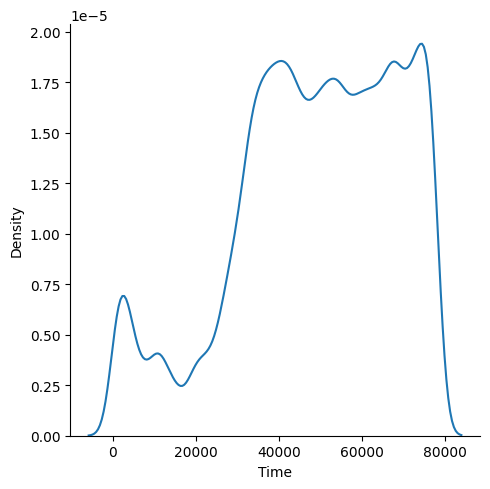

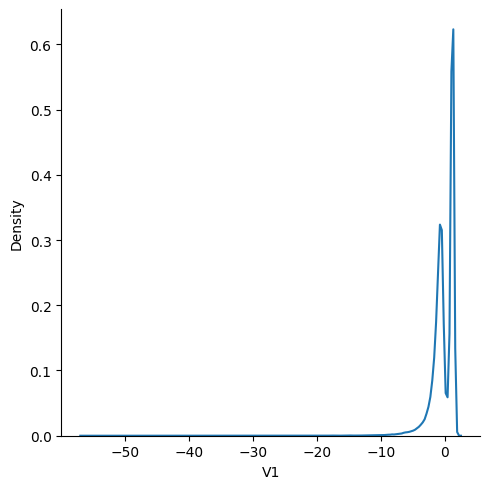

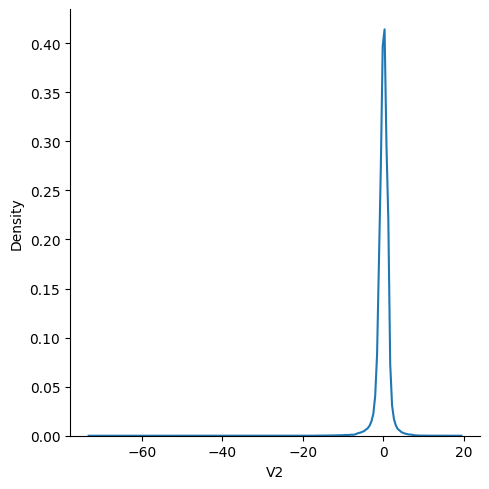

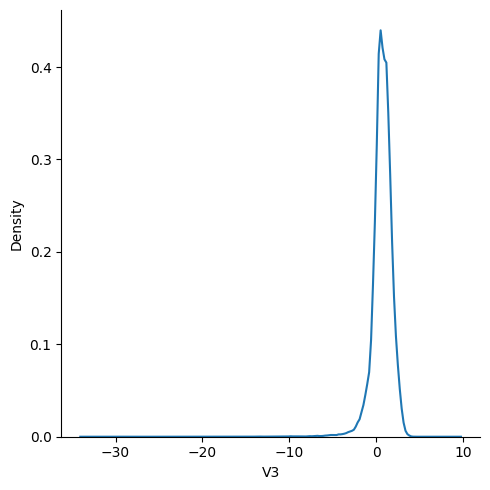

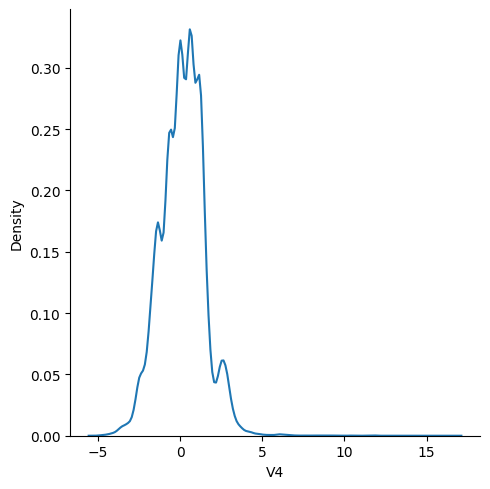

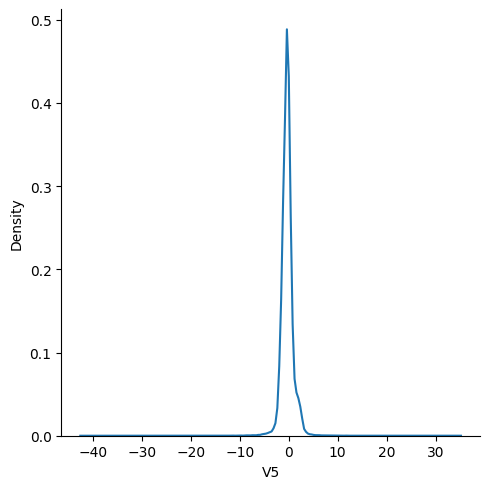

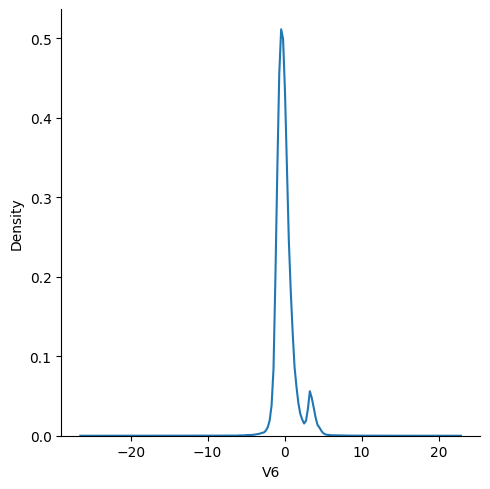

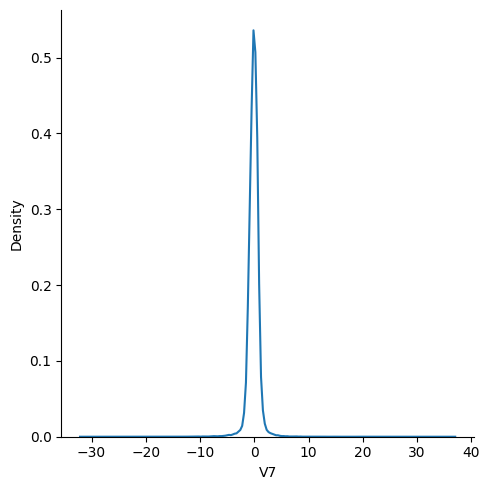

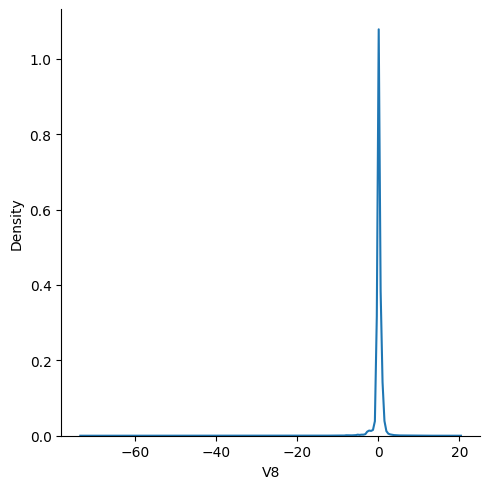

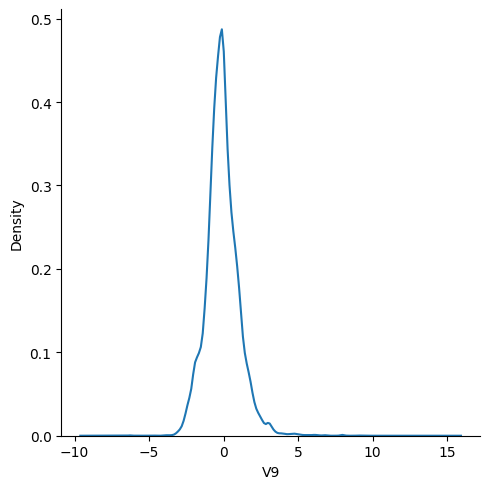

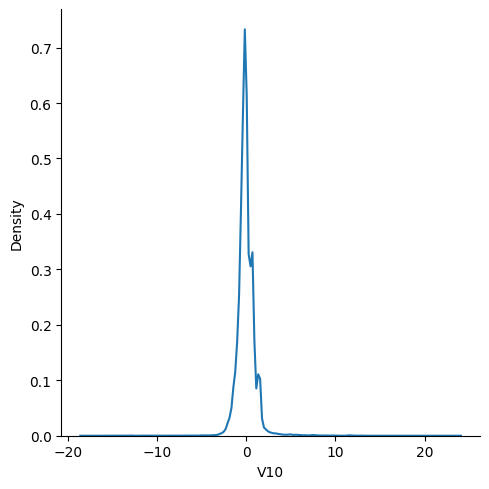

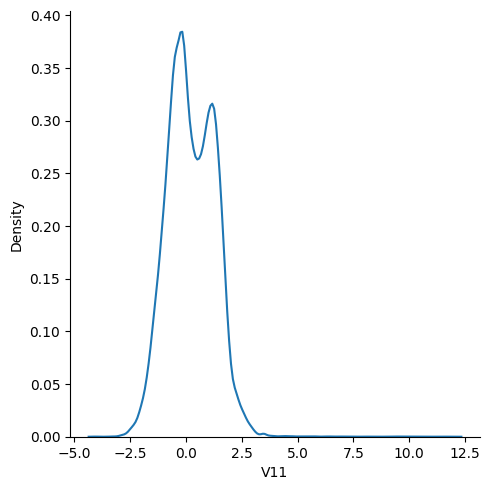

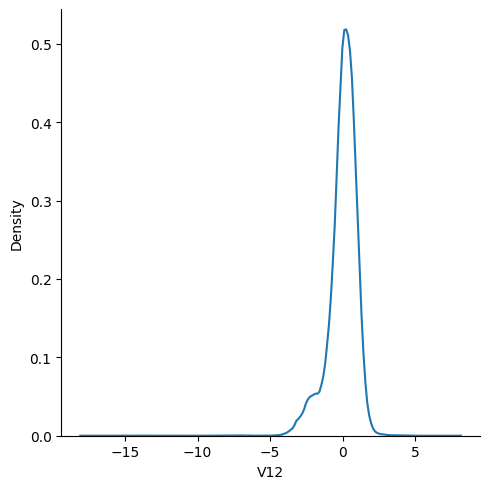

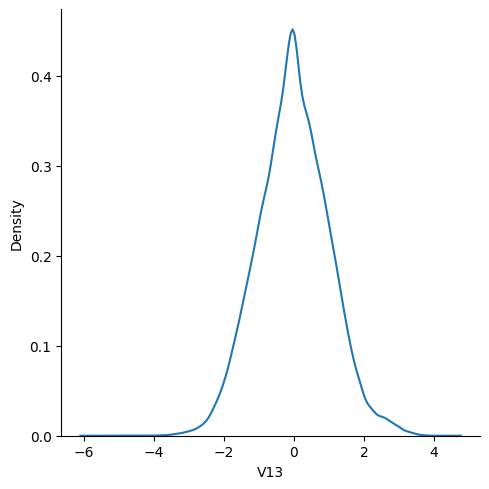

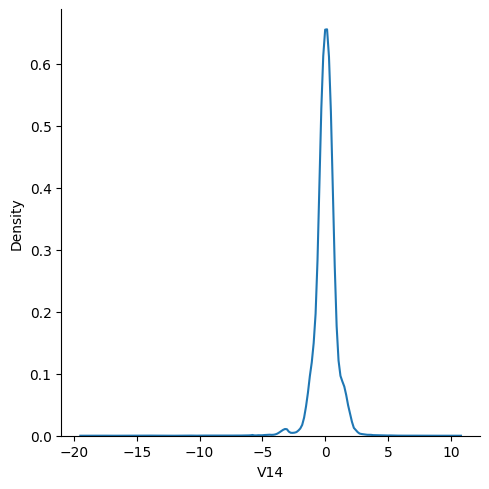

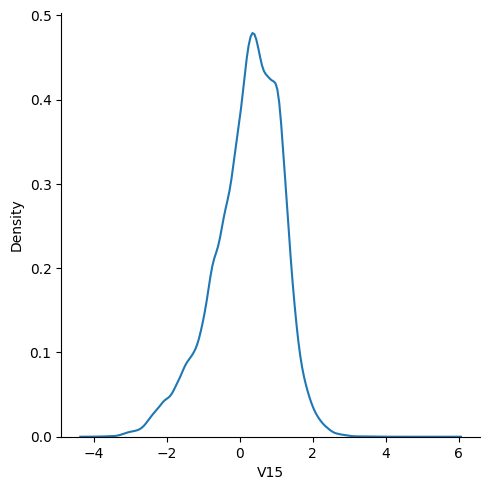

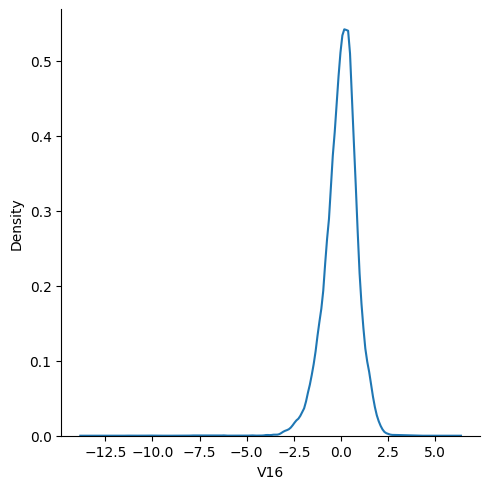

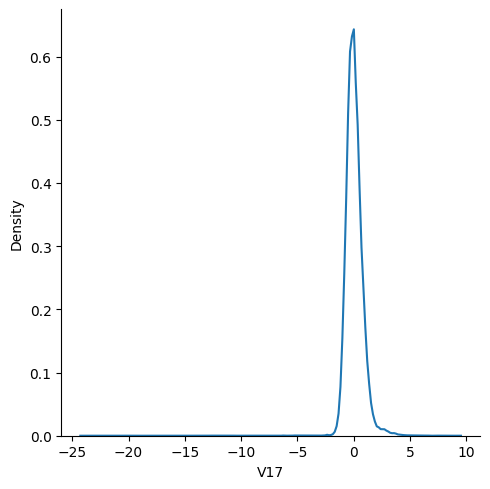

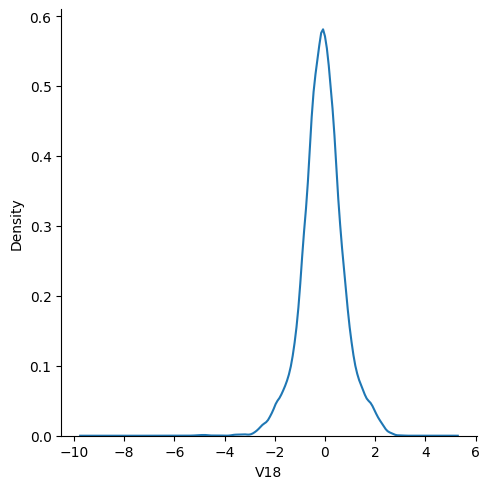

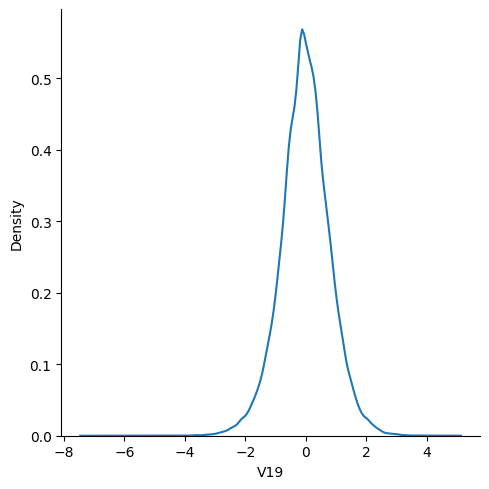

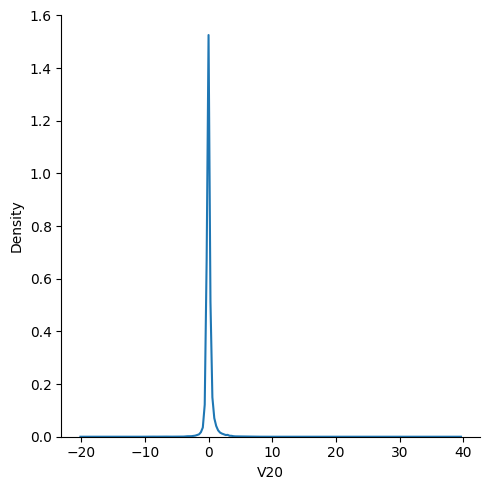

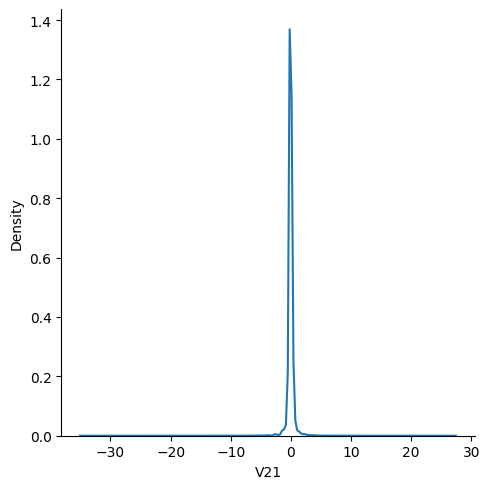

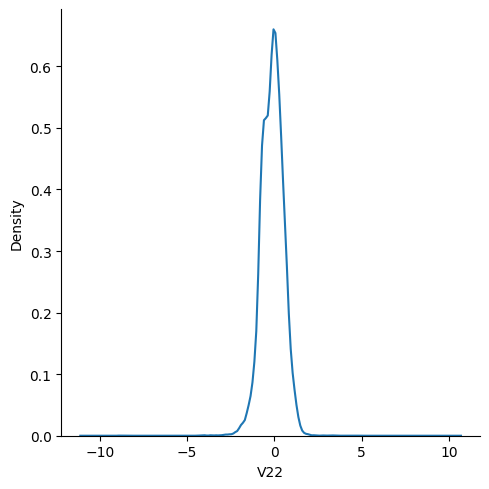

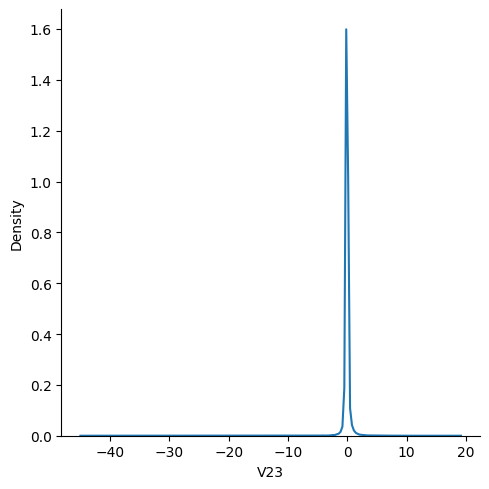

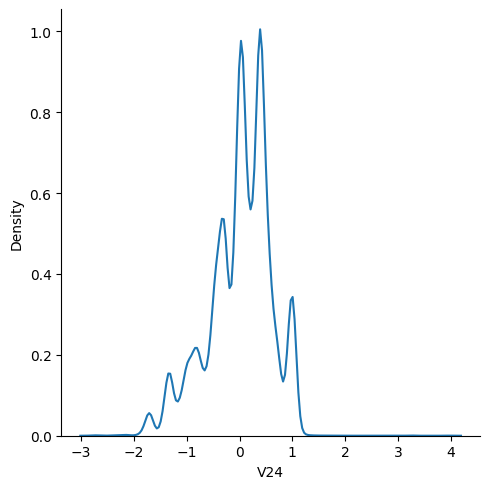

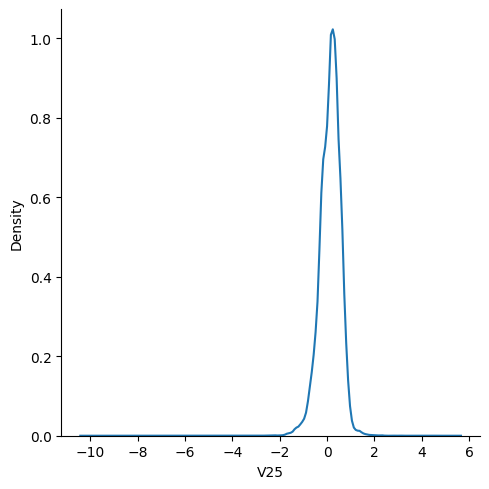

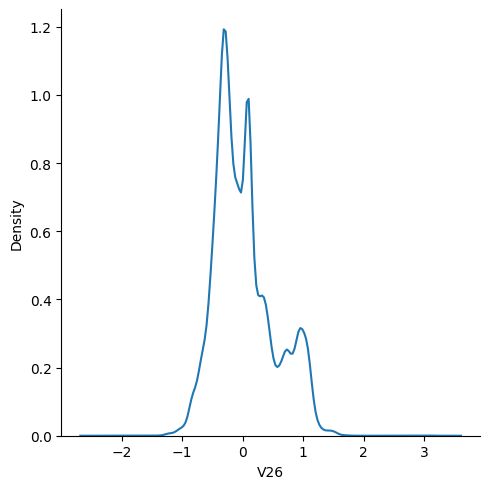

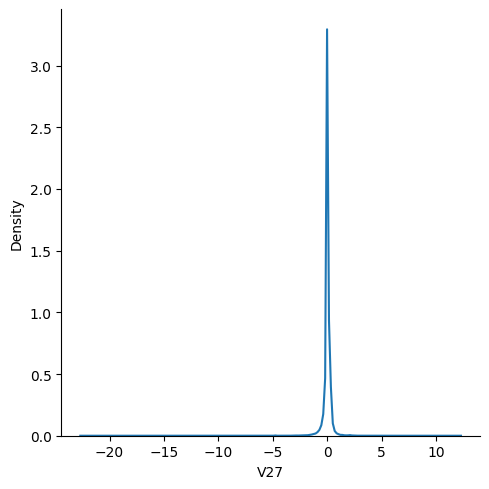

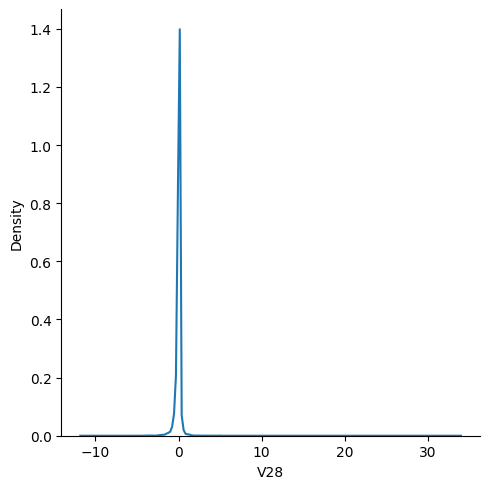

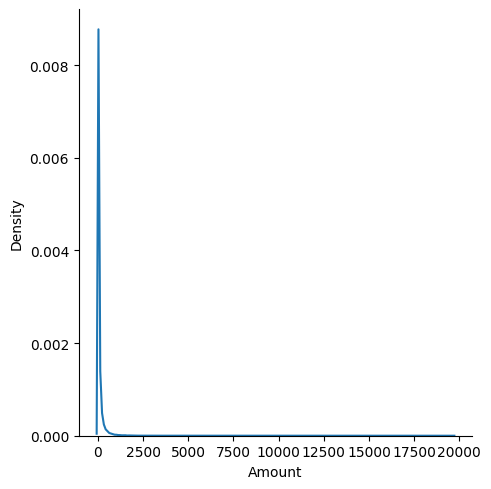

In [13]:
for i in X_train.columns:
  sns.displot(X_train[i],kind='kde')


In [14]:
def fun(data_c,var):
  plt.figure(figsize=(12,3))
  plt.subplot(1,3,1)
  data_c[var].plot(kind='kde')
  plt.subplot(1,3,2)
  sns.boxplot(x=data_c[var])
  plt.subplot(1,3,3)
  stats.probplot(data_c[var],dist='norm',plot=plt)
  plt.show()

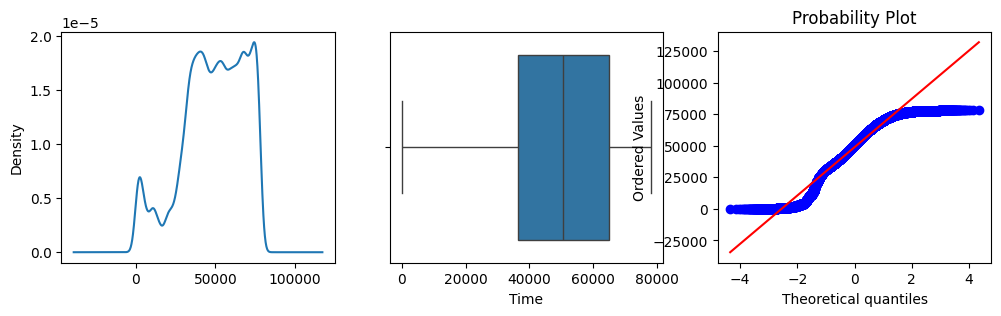

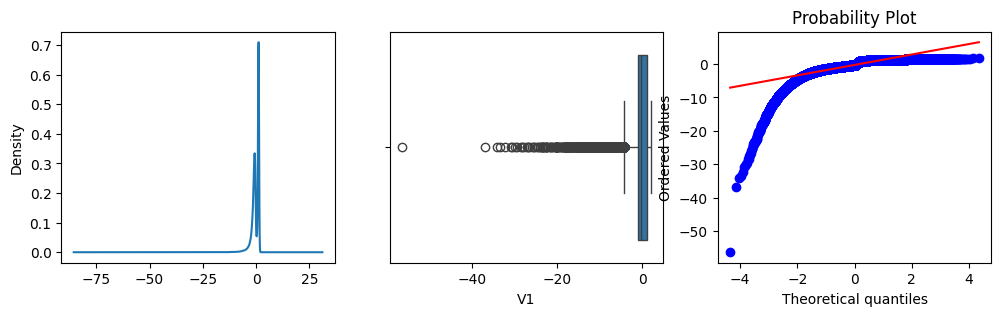

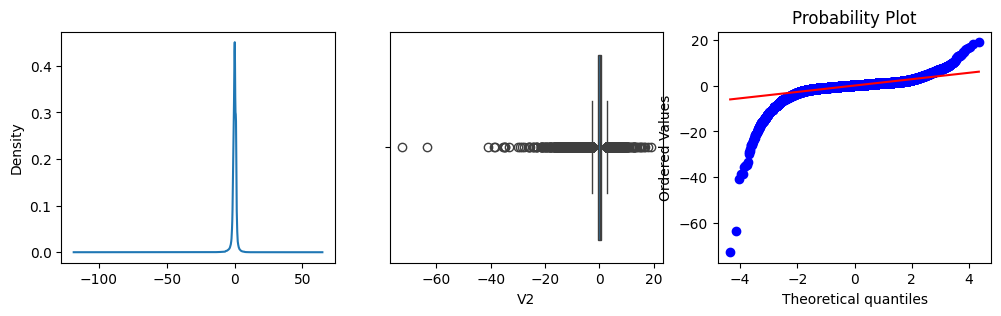

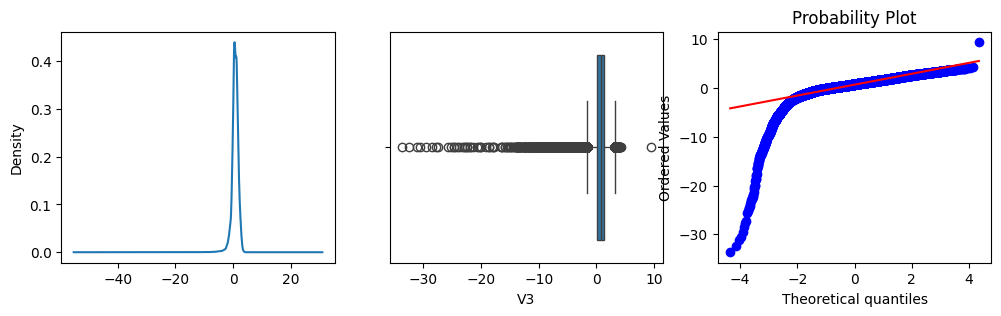

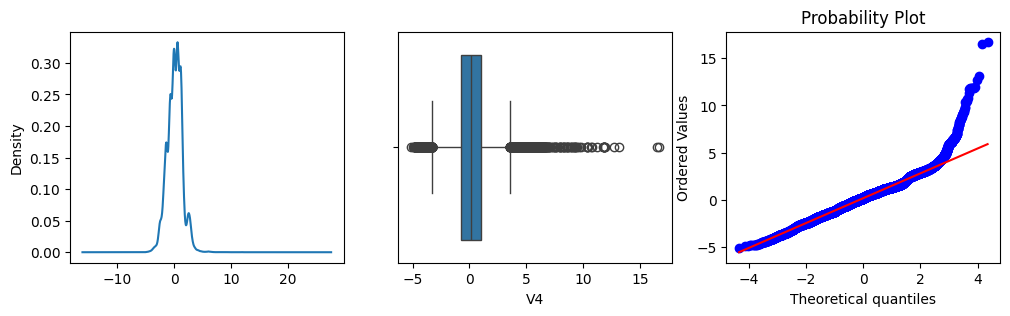

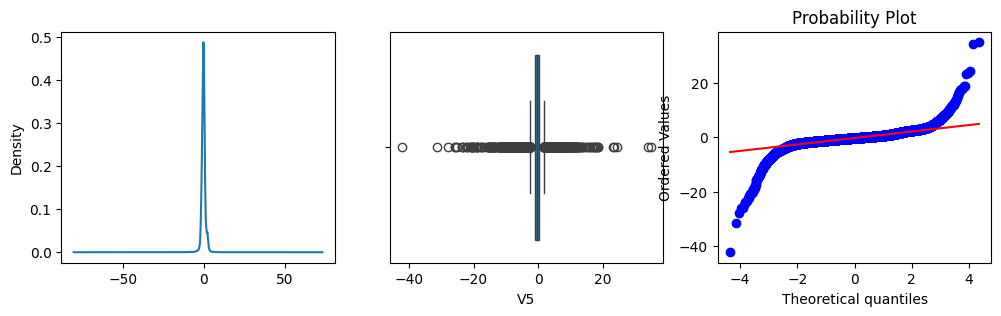

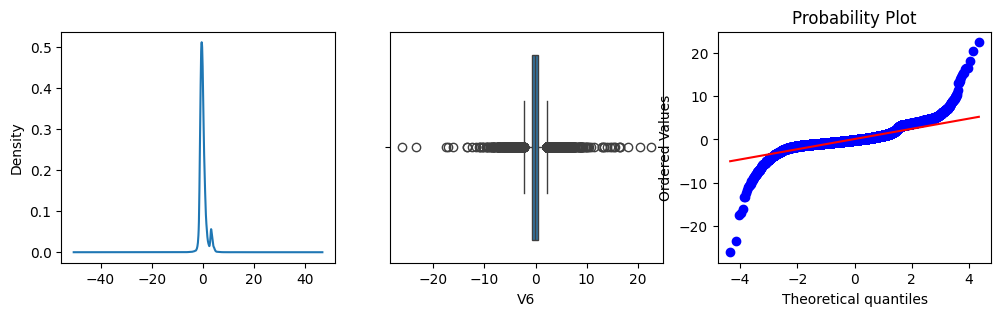

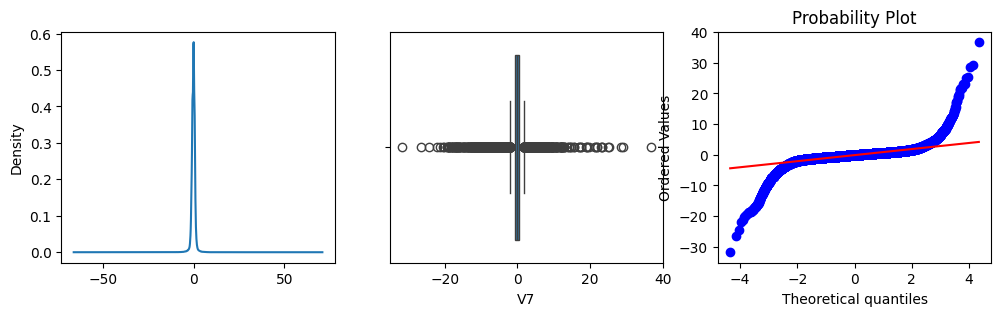

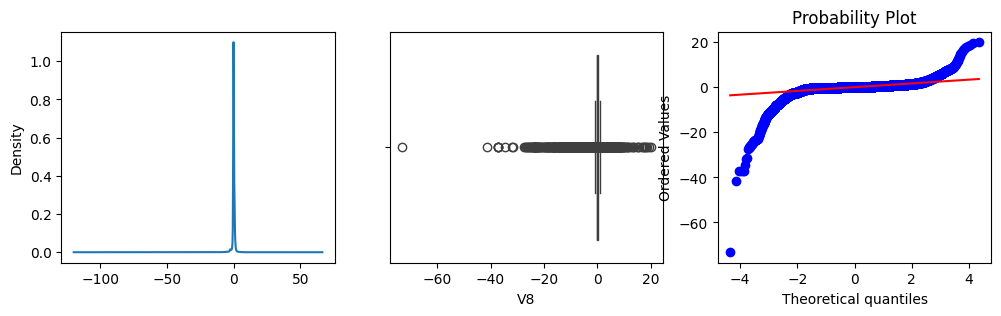

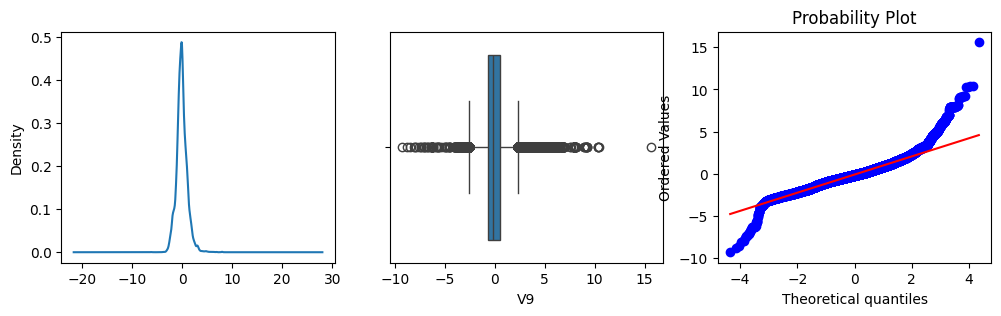

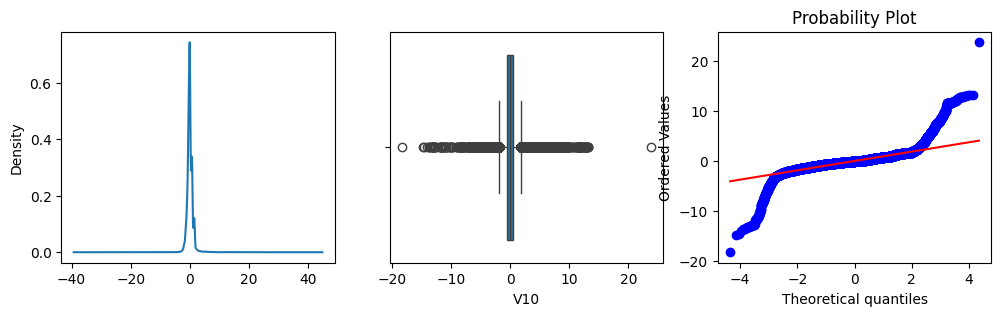

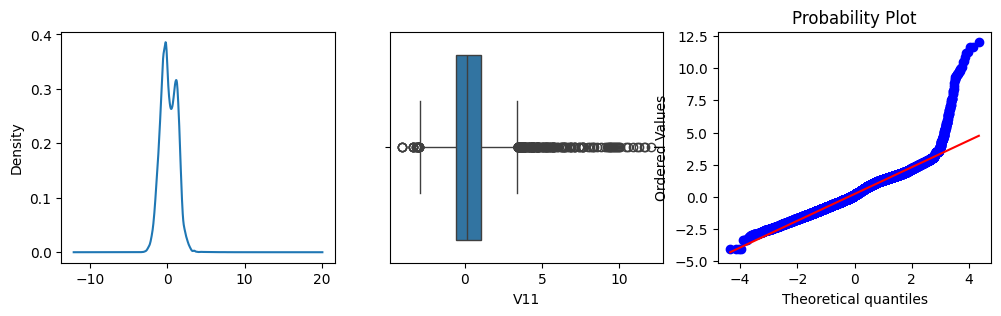

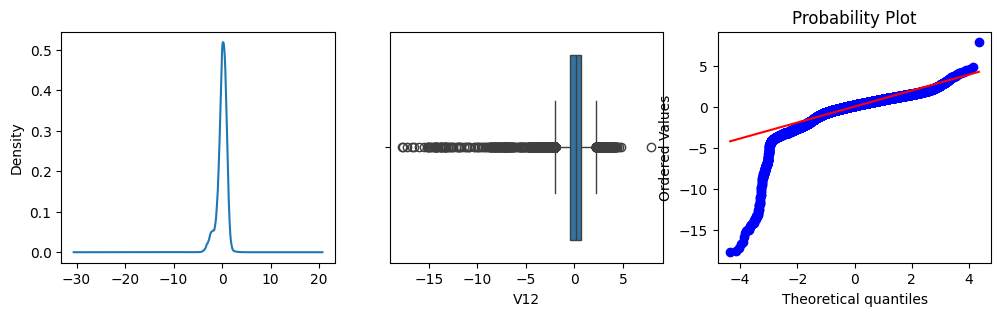

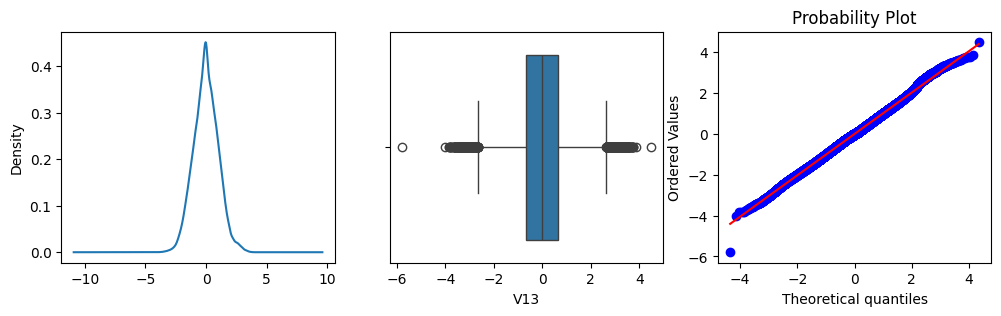

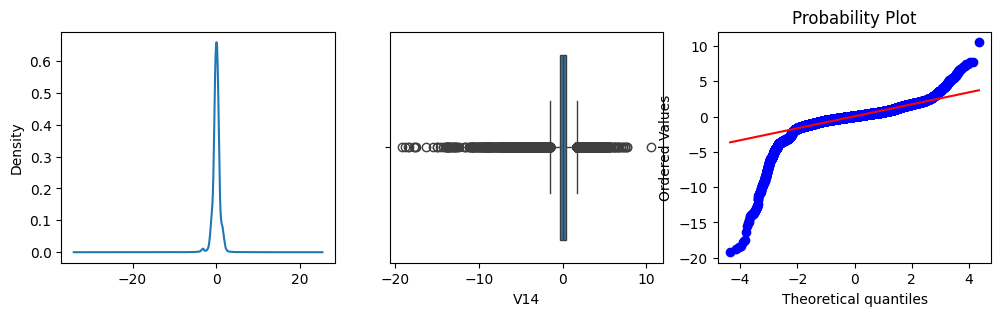

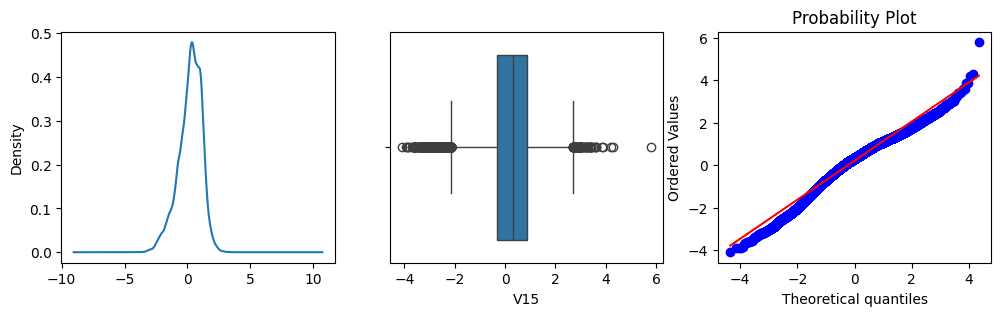

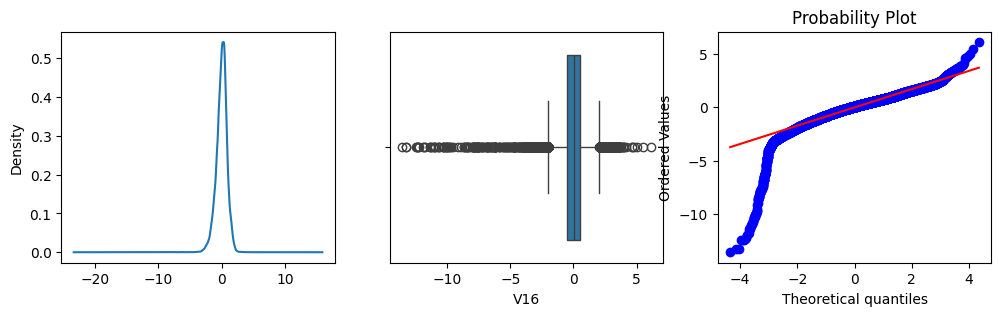

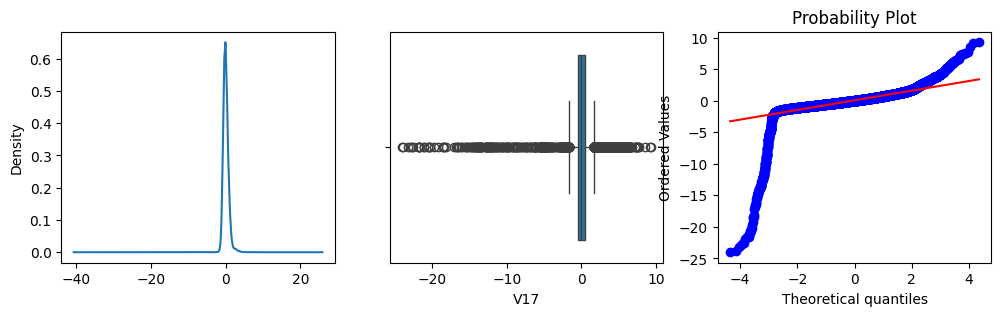

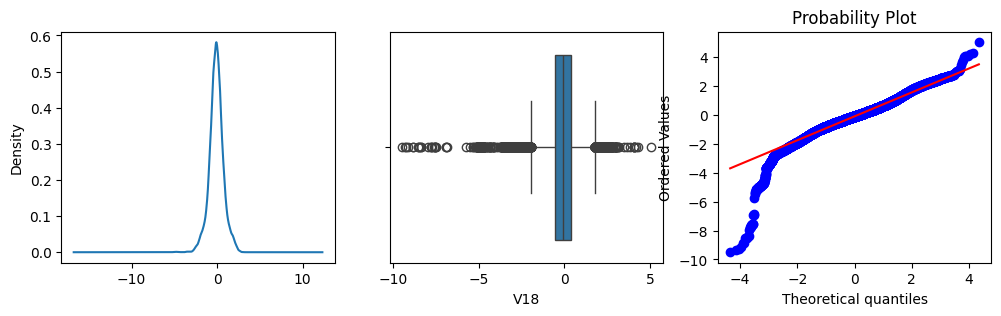

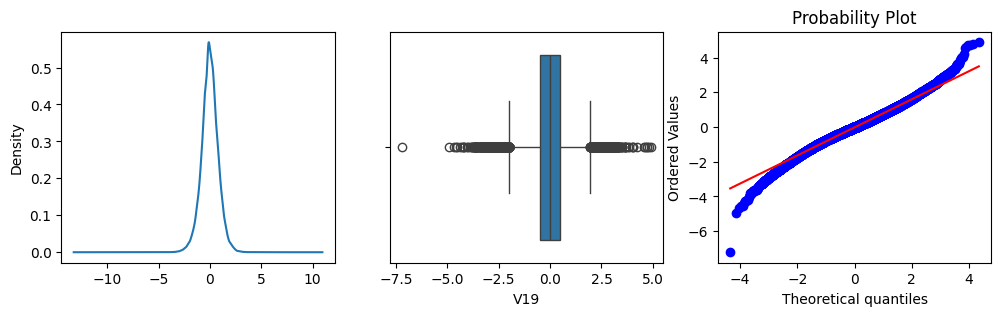

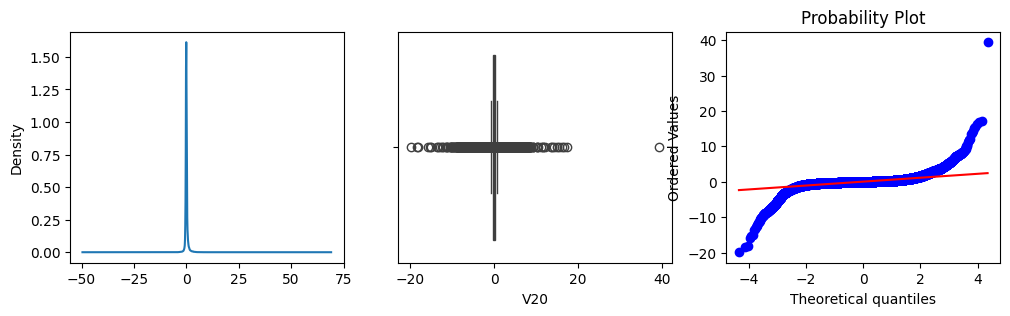

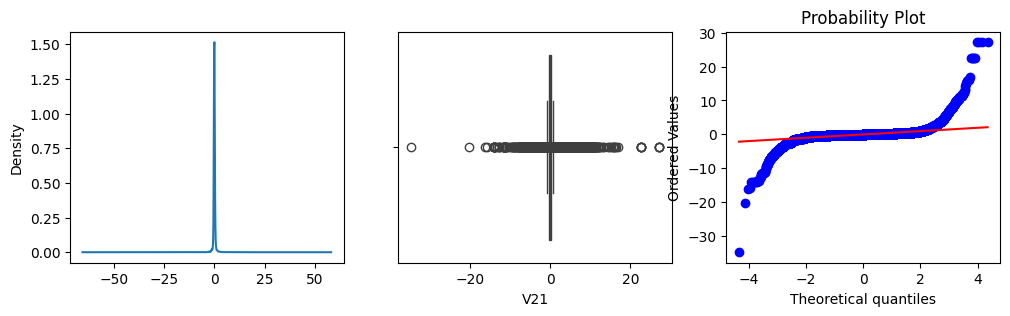

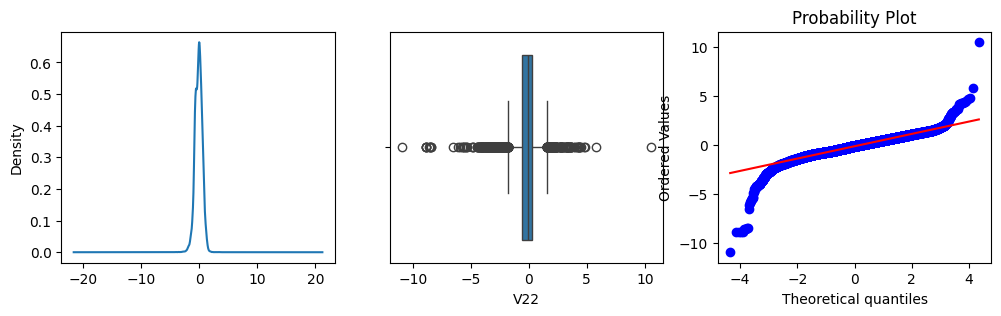

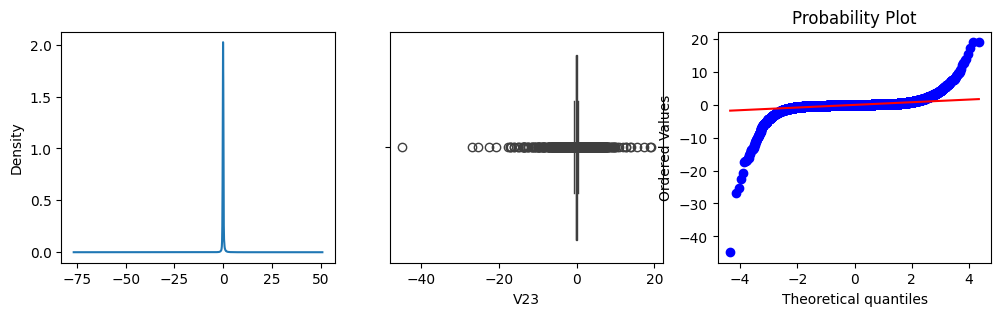

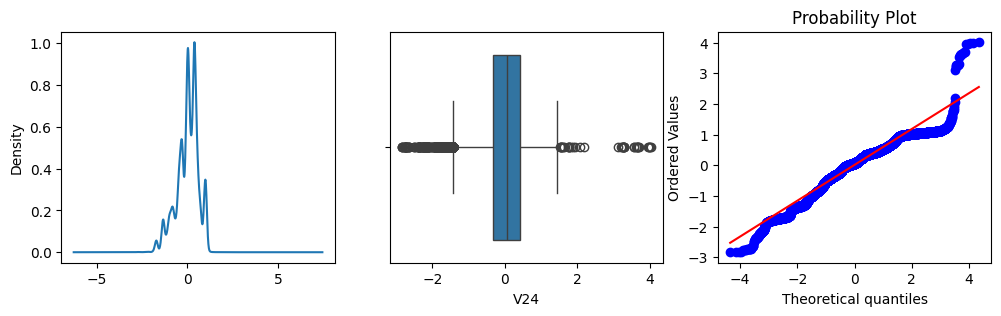

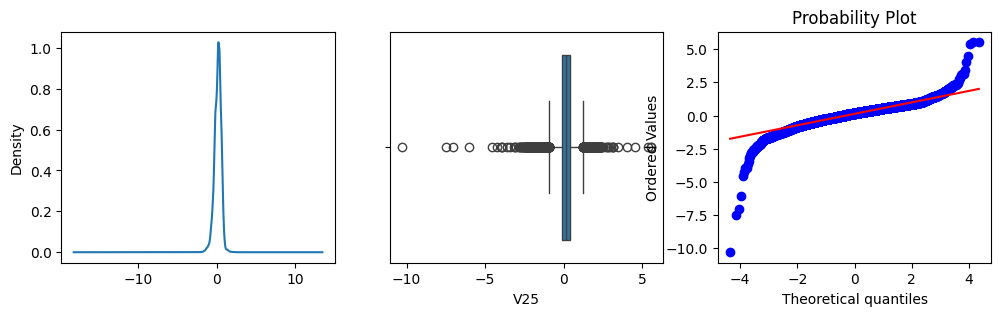

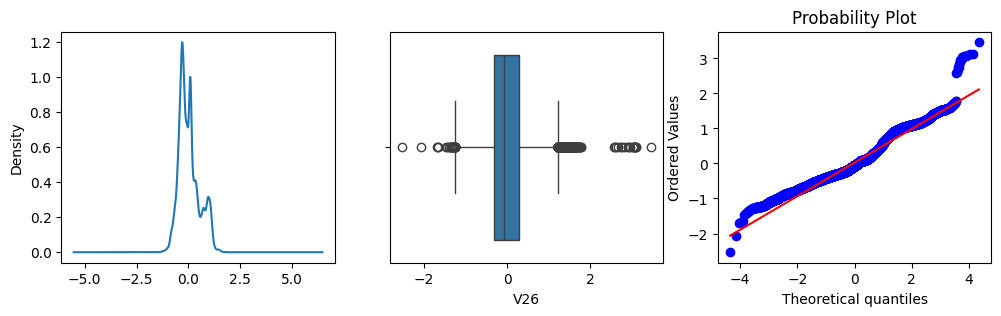

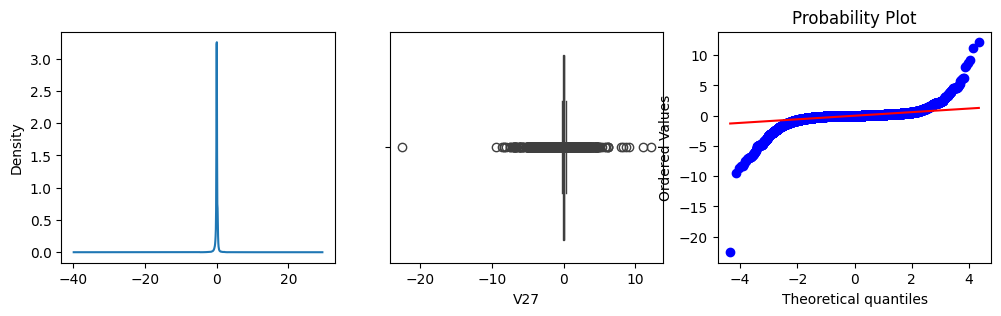

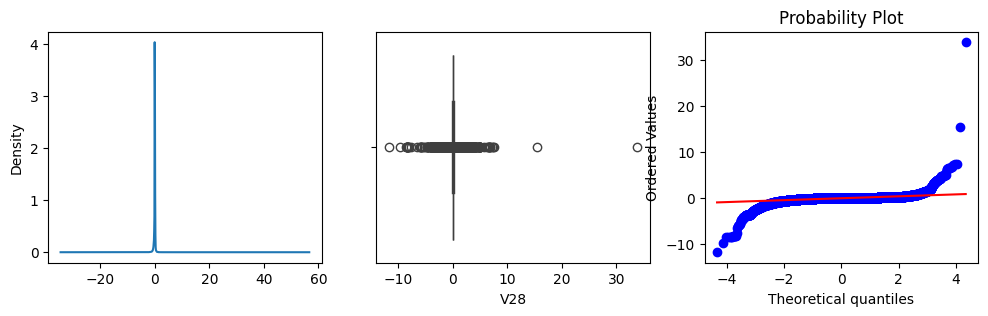

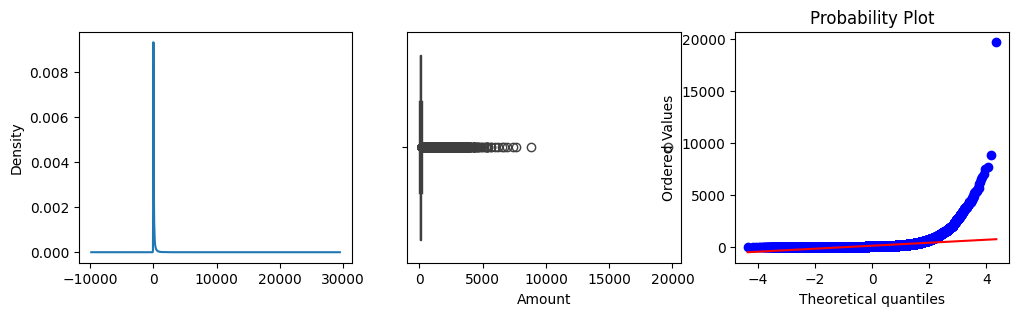

In [15]:
for i in X_train.columns:
  fun(X_train,i)

In [16]:
X_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [17]:
#trimming
def fun_1(df,var):
  iqr=df[var].quantile(0.75)-df[var].quantile(0.25)
  upper=df[var].quantile(0.75)+1.5*iqr
  lower=df[var].quantile(0.25)-1.5*iqr
  return upper,lower
for i in X_train.columns:
  upper,lower=fun_1(X_train,i)
  X_train[i+'_trimming']=np.where(X_train[i]>upper,upper,np.where(X_train[i]<lower,lower,X_train[i]))

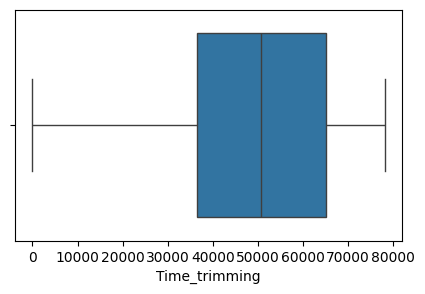

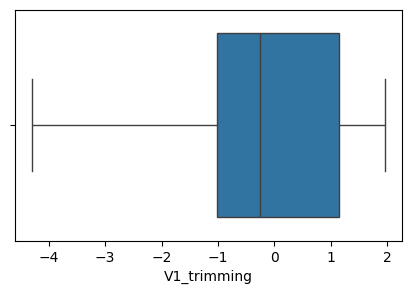

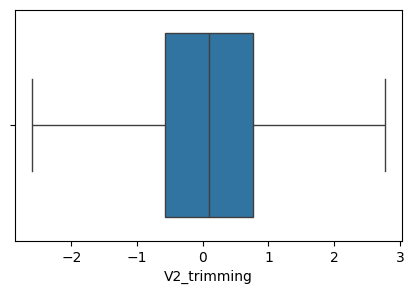

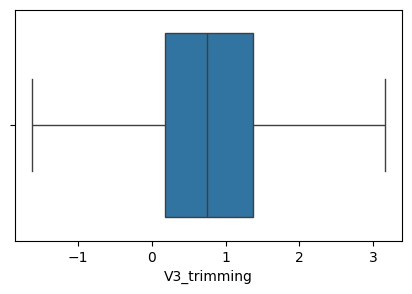

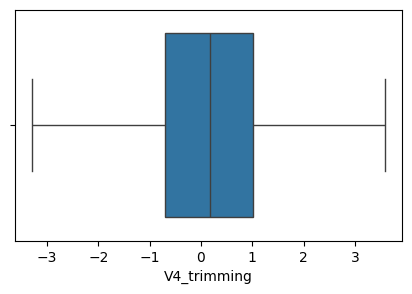

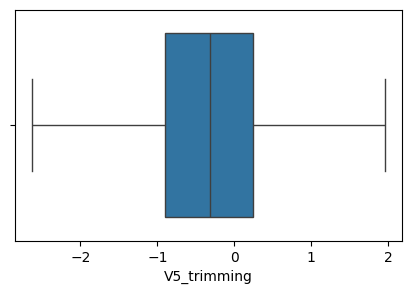

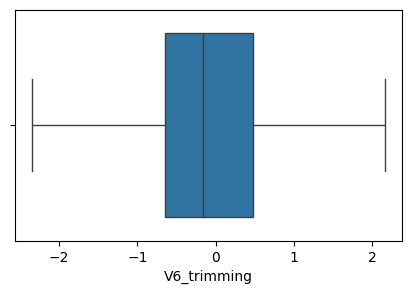

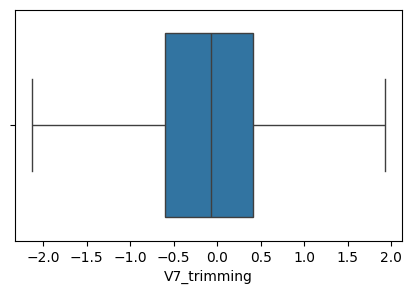

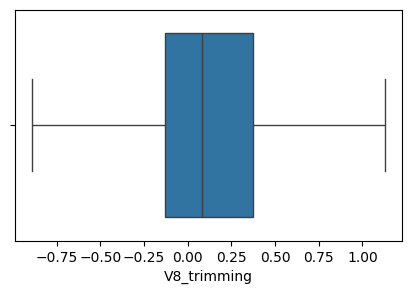

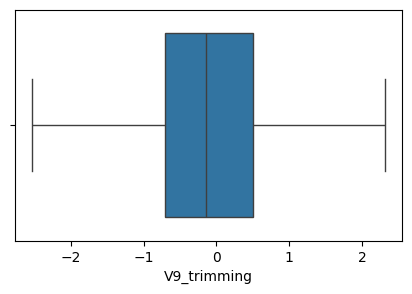

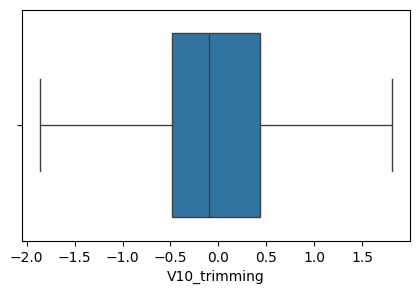

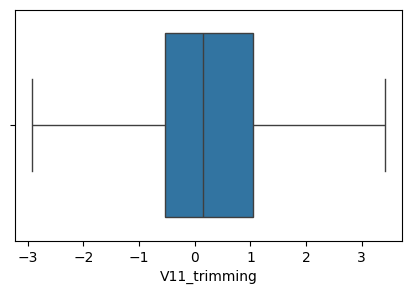

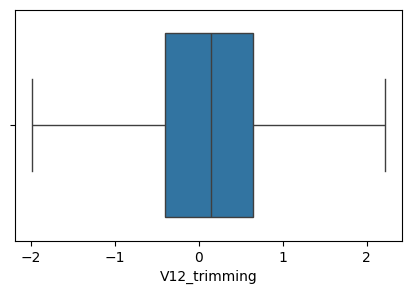

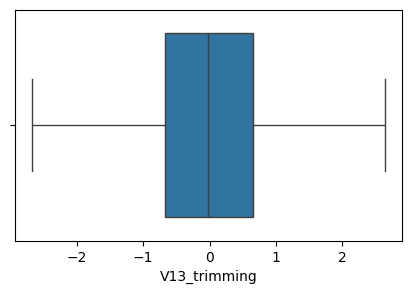

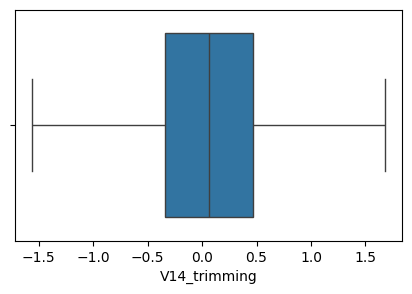

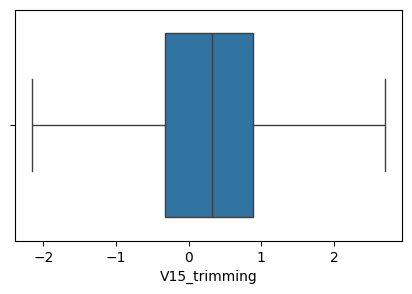

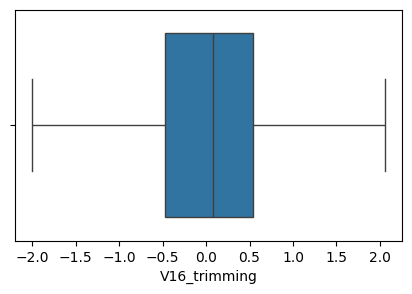

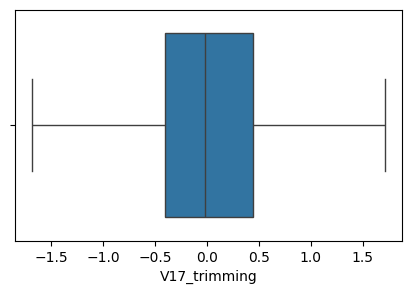

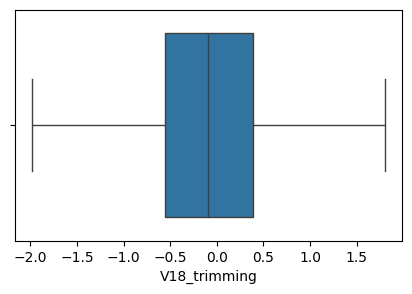

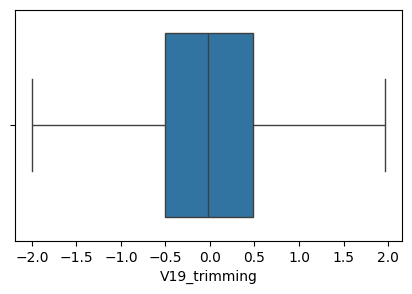

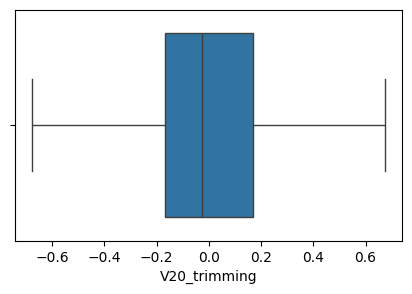

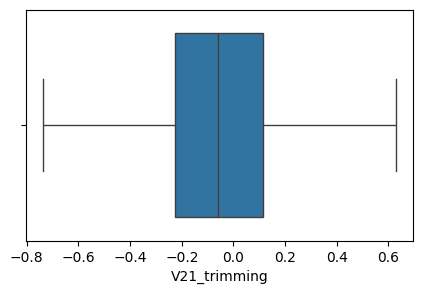

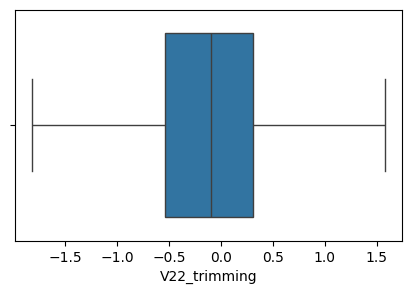

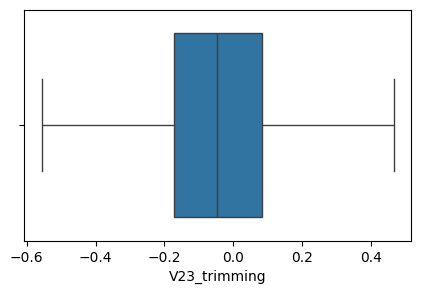

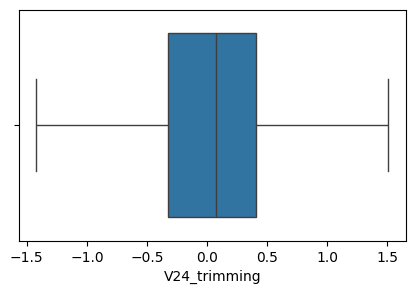

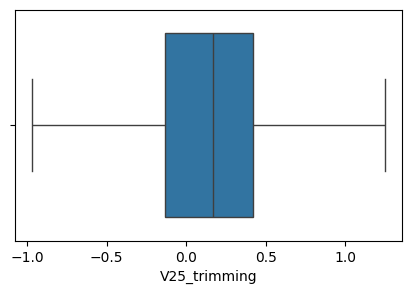

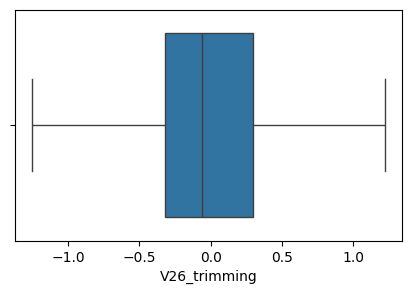

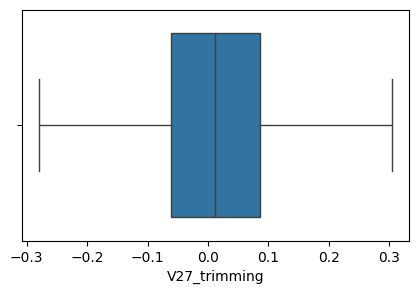

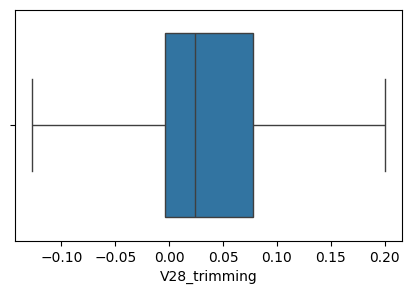

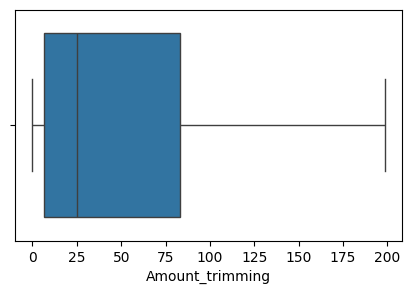

In [18]:
def box(df,var):
  plt.figure(figsize=(5,3))
  sns.boxplot(x=df[var])
  plt.show()
for i in X_train.columns:
  if "_trimming" in i:
    box(X_train,i)

In [19]:
def fun_1(df,var):
  iqr=df[var].quantile(0.75)-df[var].quantile(0.25)
  upper=df[var].quantile(0.75)+1.5*iqr
  lower=df[var].quantile(0.25)-1.5*iqr
  return upper,lower
for i in X_test.columns:
  upper,lower=fun_1(X_test,i)
  X_test[i+'_trimming']=np.where(X_test[i]>upper,upper,np.where(X_test[i]<lower,lower,X_test[i]))


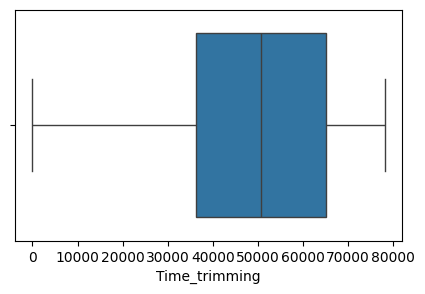

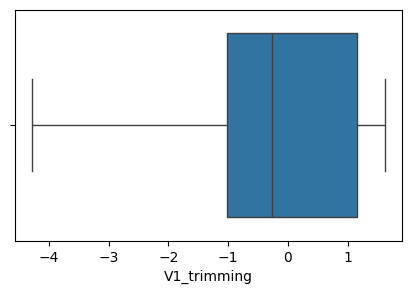

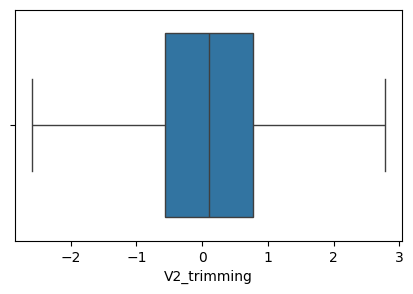

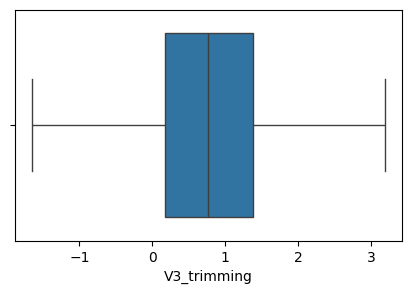

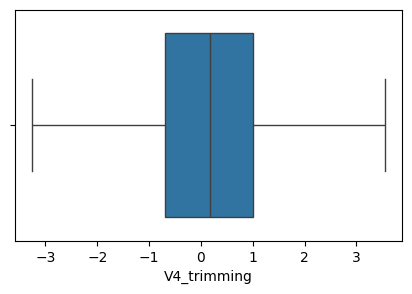

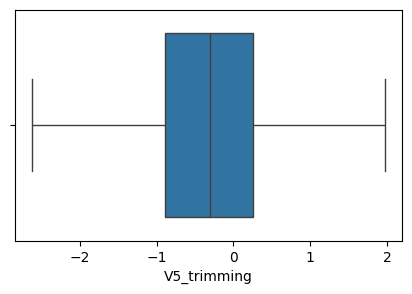

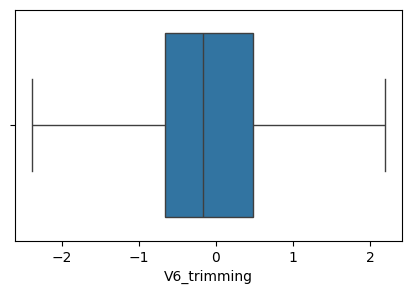

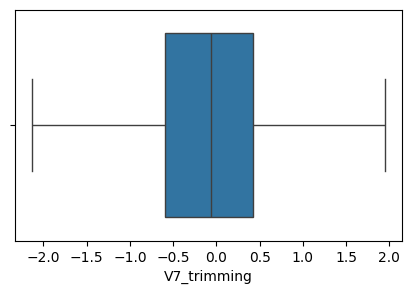

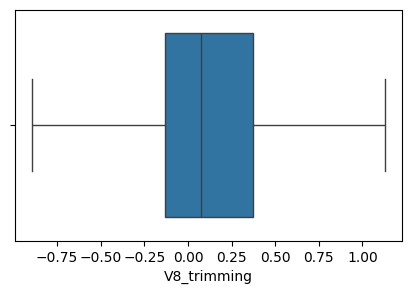

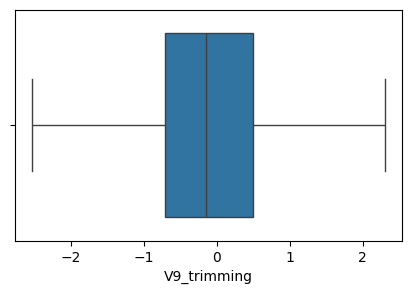

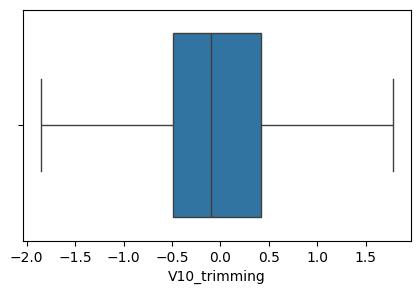

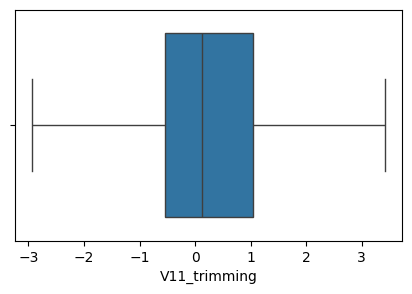

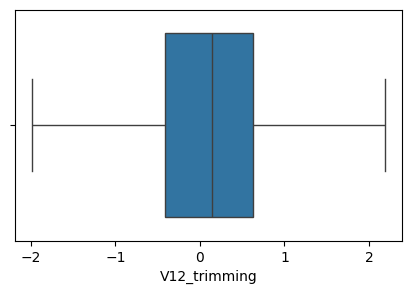

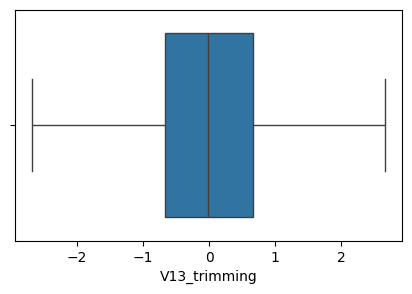

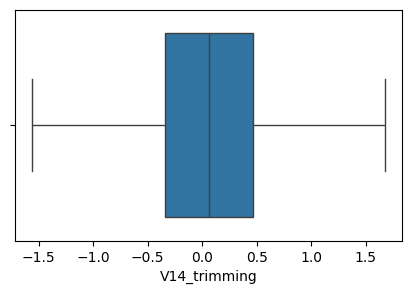

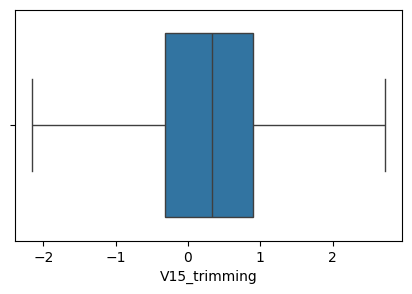

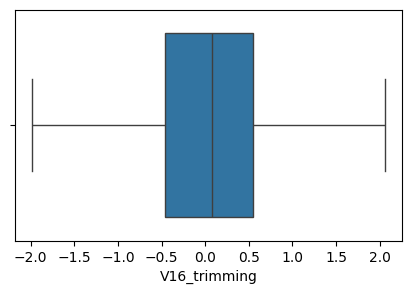

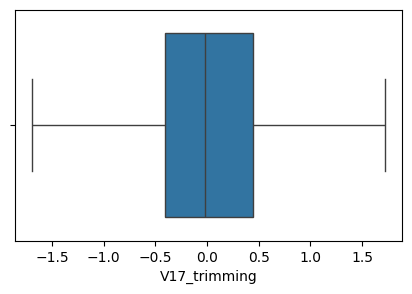

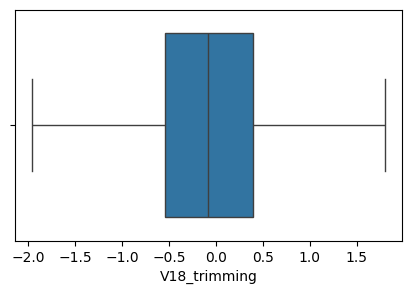

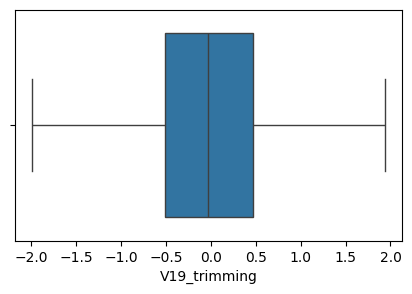

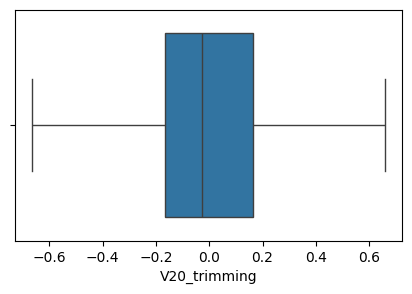

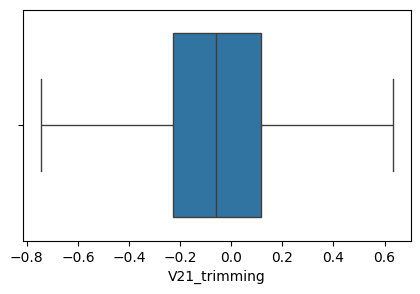

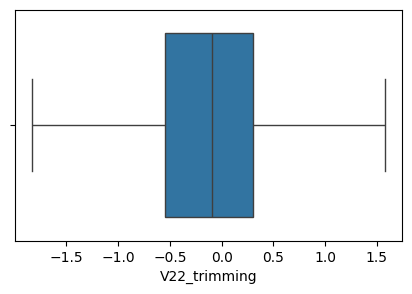

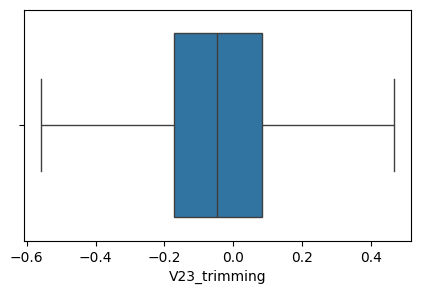

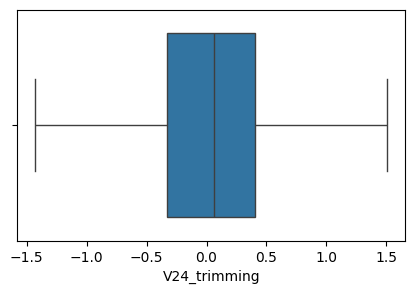

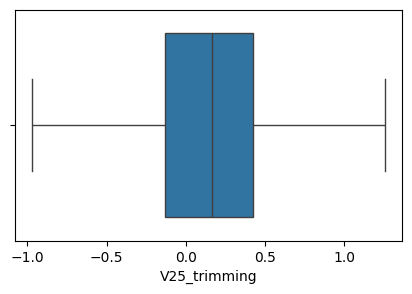

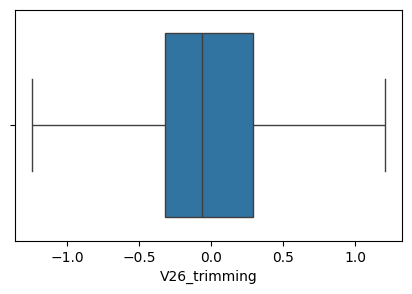

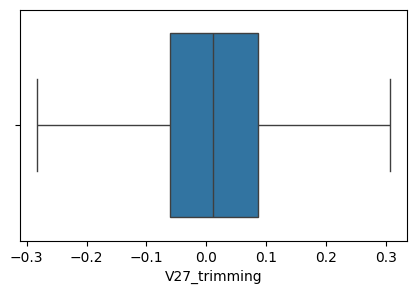

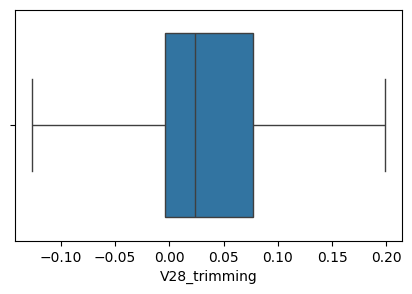

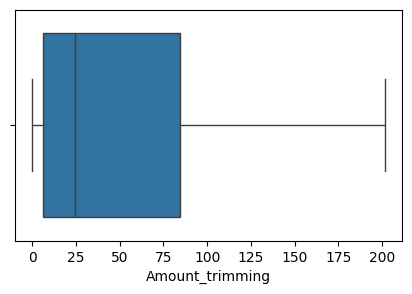

In [20]:
def box(df,var):
  plt.figure(figsize=(5,3))
  sns.boxplot(x=df[var])
  plt.show()
for i in X_test.columns:
  if "_trimming" in i:
    box(X_test,i)

In [21]:
X_test.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Time_trimming', 'V1_trimming', 'V2_trimming', 'V3_trimming',
       'V4_trimming', 'V5_trimming', 'V6_trimming', 'V7_trimming',
       'V8_trimming', 'V9_trimming', 'V10_trimming', 'V11_trimming',
       'V12_trimming', 'V13_trimming', 'V14_trimming', 'V15_trimming',
       'V16_trimming', 'V17_trimming', 'V18_trimming', 'V19_trimming',
       'V20_trimming', 'V21_trimming', 'V22_trimming', 'V23_trimming',
       'V24_trimming', 'V25_trimming', 'V26_trimming', 'V27_trimming',
       'V28_trimming', 'Amount_trimming'],
      dtype='object')

In [22]:
X_train.drop(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],axis=1,inplace=True)

In [23]:
X_test.drop(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],axis=1,inplace=True)

In [24]:
X_train.columns

Index(['Time_trimming', 'V1_trimming', 'V2_trimming', 'V3_trimming',
       'V4_trimming', 'V5_trimming', 'V6_trimming', 'V7_trimming',
       'V8_trimming', 'V9_trimming', 'V10_trimming', 'V11_trimming',
       'V12_trimming', 'V13_trimming', 'V14_trimming', 'V15_trimming',
       'V16_trimming', 'V17_trimming', 'V18_trimming', 'V19_trimming',
       'V20_trimming', 'V21_trimming', 'V22_trimming', 'V23_trimming',
       'V24_trimming', 'V25_trimming', 'V26_trimming', 'V27_trimming',
       'V28_trimming', 'Amount_trimming'],
      dtype='object')

In [25]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)


VarianceThreshold(threshold=0)

In [26]:
sum(var_thres.get_support())

np.int64(30)

In [27]:
X_train.columns[var_thres.get_support()]

Index(['Time_trimming', 'V1_trimming', 'V2_trimming', 'V3_trimming',
       'V4_trimming', 'V5_trimming', 'V6_trimming', 'V7_trimming',
       'V8_trimming', 'V9_trimming', 'V10_trimming', 'V11_trimming',
       'V12_trimming', 'V13_trimming', 'V14_trimming', 'V15_trimming',
       'V16_trimming', 'V17_trimming', 'V18_trimming', 'V19_trimming',
       'V20_trimming', 'V21_trimming', 'V22_trimming', 'V23_trimming',
       'V24_trimming', 'V25_trimming', 'V26_trimming', 'V27_trimming',
       'V28_trimming', 'Amount_trimming'],
      dtype='object')

In [28]:
var_thres=VarianceThreshold(threshold=0.01)
var_thres.fit(X_train)


VarianceThreshold(threshold=0.01)

In [29]:
sum(var_thres.get_support())

np.int64(29)

In [30]:
X_train.columns[var_thres.get_support()]

Index(['Time_trimming', 'V1_trimming', 'V2_trimming', 'V3_trimming',
       'V4_trimming', 'V5_trimming', 'V6_trimming', 'V7_trimming',
       'V8_trimming', 'V9_trimming', 'V10_trimming', 'V11_trimming',
       'V12_trimming', 'V13_trimming', 'V14_trimming', 'V15_trimming',
       'V16_trimming', 'V17_trimming', 'V18_trimming', 'V19_trimming',
       'V20_trimming', 'V21_trimming', 'V22_trimming', 'V23_trimming',
       'V24_trimming', 'V25_trimming', 'V26_trimming', 'V27_trimming',
       'Amount_trimming'],
      dtype='object')

In [31]:
X_train.head()

,Time_trimming,V1_trimming,V2_trimming,V3_trimming,V4_trimming,V5_trimming,V6_trimming,V7_trimming,V8_trimming,V9_trimming,...,V20_trimming,V21_trimming,V22_trimming,V23_trimming,V24_trimming,V25_trimming,V26_trimming,V27_trimming,V28_trimming,Amount_trimming
67047,52342.0,1.219495,-0.802878,0.959611,-0.838897,-1.040543,0.556257,-1.226948,0.324310,-0.757151,...,0.102361,0.503960,1.442890,-0.072799,-0.214064,0.264954,-0.011245,0.068306,0.012527,24.99
39094,39692.0,1.156355,0.237251,0.379550,1.070073,-0.374101,-0.773297,0.110140,-0.078839,-0.222503,...,-0.138056,0.096879,0.231755,-0.094932,0.523407,0.608428,-0.358034,0.004308,0.013851,19.95
54550,46500.0,1.181681,-0.016605,0.166931,0.574002,-0.309908,-0.373569,-0.054804,0.104497,0.145981,...,-0.266334,0.004016,0.088884,-0.043989,0.252579,0.477725,0.559812,-0.050350,-0.014522,0.01
20545,31113.0,1.315591,0.193435,0.031727,0.443466,-0.048852,-0.563617,0.091077,-0.156871,0.133758,...,-0.087738,-0.259719,-0.760633,-0.022970,-0.458734,0.416104,0.226145,-0.039531,0.006758,7.21
44211,41848.0,-0.795239,0.628992,1.423363,-1.904617,-0.473714,-1.329656,0.428069,-0.422562,-1.220539,...,-0.018819,0.469332,1.076925,-0.196459,0.761469,-0.078695,-0.413084,-0.279133,0.143624,0.76


In [32]:
co=[]
for i in X_train:
  s=pearsonr(X_train[i],Y_train)
  co.append(s)
co=np.array(co)


In [33]:
p_value=pd.Series(co[:,1],index=X_train.columns)
p_value

,0
Time_trimming,3.094068e-06
V1_trimming,3.309623e-96
V2_trimming,7.816174e-121
V3_trimming,8.179949e-189
V4_trimming,3.960438e-206
V5_trimming,1.215657e-55
V6_trimming,2.664075e-72
V7_trimming,5.402414e-126
V8_trimming,1.758528e-32
V9_trimming,3.165471e-95


In [34]:
k=[]
g=list(p_value)
for i in p_value:
  if i>0.05:
    k.append(g.index(i))
k


[13, 15, 22, 26, 29]

In [35]:
for i in range(len(X_train.columns)):
  if i in k:
    print(X_train.columns[i])

V13_trimming
V15_trimming
V22_trimming
V26_trimming
Amount_trimming


In [36]:
X_train.drop(['V22_trimming','V23_trimming','V25_trimming'],axis=1,inplace=True)

In [37]:
X_test.drop(['V22_trimming','V23_trimming','V25_trimming'],axis=1,inplace=True)

In [38]:
sm=SMOTE(random_state=42)
X_train,Y_train=sm.fit_resample(X_train,Y_train)

In [39]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [40]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [41]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)


DecisionTreeClassifier()

In [42]:
rf=RandomForestClassifier(class_weight="balanced",random_state=42)
rf.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [43]:
print("KNN: ",classification_report(Y_test,knn.predict(X_test)))
print("DT: ",classification_report(Y_test,dt.predict(X_test)))
print("RF: ",classification_report(Y_test,rf.predict(X_test)))
print("LR: ",classification_report(Y_test,lr.predict(X_test)))

KNN:                precision    recall  f1-score   support

         0.0       1.00      0.90      0.95     25317
         1.0       0.01      0.63      0.03        52

    accuracy                           0.90     25369
   macro avg       0.51      0.77      0.49     25369
weighted avg       1.00      0.90      0.94     25369

DT:                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     25317
         1.0       0.48      0.92      0.64        52

    accuracy                           1.00     25369
   macro avg       0.74      0.96      0.82     25369
weighted avg       1.00      1.00      1.00     25369

RF:                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     25317
         1.0       0.79      0.92      0.85        52

    accuracy                           1.00     25369
   macro avg       0.89      0.96      0.92     25369
weighted avg       1.00      1.00      1.00     25369

LR:

In [44]:
print("CONFUSION MATRIX FOR KNN: ",confusion_matrix(Y_test,knn.predict(X_test)))
print("CONFUSION MATRIX FOR DT: ",confusion_matrix(Y_test,dt.predict(X_test)))
print("CONFUSION MATRIX FOR RF: ",confusion_matrix(Y_test,rf.predict(X_test)))
print("CONFUSION MATRIX FOR LR: ",confusion_matrix(Y_test,lr.predict(X_test)))

CONFUSION MATRIX FOR KNN:  [[22765  2552]
 [   19    33]]
CONFUSION MATRIX FOR DT:  [[25266    51]
 [    4    48]]
CONFUSION MATRIX FOR RF:  [[25304    13]
 [    4    48]]
CONFUSION MATRIX FOR LR:  [[24515   802]
 [    2    50]]


In [45]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

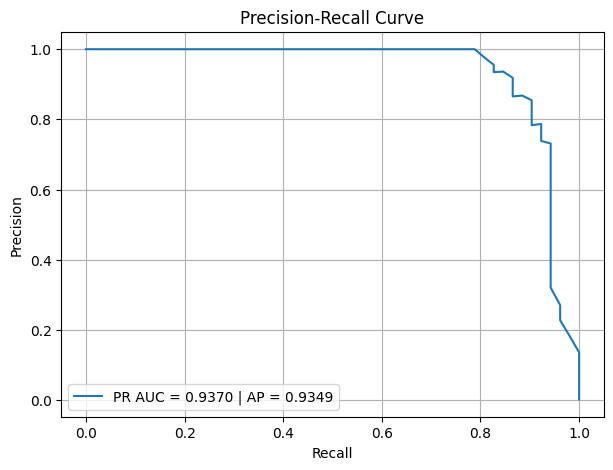

Precision-Recall AUC: 0.9370
Average Precision Score: 0.9349


In [46]:
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_proba)
pr_auc = auc(recall, precision)
avg_precision = average_precision_score(Y_test, y_pred_proba)
plt.figure(figsize=(7,5))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f} | AP = {avg_precision:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

print(f"Precision-Recall AUC: {pr_auc:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")
